# **Dataset goodbooks-10k dari Kaggle**

## IMPORT LIBRARY


In [1]:
# Install Kaggle API untuk mengunduh dataset dari Kaggle
!pip install kaggle

In [73]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

***Konfigurasi API Kaggle***

In [5]:
os.environ['KAGGLE_USERNAME'] = "evameivinadwiana"
os.environ['KAGGLE_KEY'] = "efbafcb258eb3a5f3033f21f925e06ef"

***Download dan Ekstrak Dataset***

In [6]:
# Download dataset goodbooks-10k dari Kaggle
!kaggle datasets download zygmunt/goodbooks-10k

# Extract file ZIP ke folder ./goodbooks10k (overwrite jika sudah ada)
!unzip -o goodbooks-10k.zip -d ./goodbooks10k

Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
  0% 0.00/11.6M [00:00<?, ?B/s]
100% 11.6M/11.6M [00:00<00:00, 935MB/s]
Archive:  goodbooks-10k.zip
  inflating: ./goodbooks10k/book_tags.csv  
  inflating: ./goodbooks10k/books.csv  
  inflating: ./goodbooks10k/ratings.csv  
  inflating: ./goodbooks10k/sample_book.xml  
  inflating: ./goodbooks10k/tags.csv  
  inflating: ./goodbooks10k/to_read.csv  


## DATA UNDERSTANDING


***Load dataset Goodbooks-10k***

In [9]:
# Load dataset goodbooks-10k
books = pd.read_csv('./goodbooks10k/books.csv')
book_tags = pd.read_csv('./goodbooks10k/book_tags.csv')
ratings = pd.read_csv('./goodbooks10k/ratings.csv')
tags = pd.read_csv('./goodbooks10k/tags.csv')
to_read = pd.read_csv('./goodbooks10k/to_read.csv')

Lima dataset dimuat dari direktori Goodbooks-10k untuk proses eksplorasi lebih lanjut.

*Ringkasan Jumlah Data*

In [10]:
# Tampilkan kolom dari book_tags untuk memastikan nama kolom yang benar
print(book_tags.columns)

# Informasi ringkas jumlah data di setiap dataset
print('Jumlah buku:', len(books))
print('Jumlah tag buku:', len(book_tags['goodreads_book_id'].unique())) # Assuming 'goodreads_book_id' is the correct column name based on common Kaggle datasets. Adjust if necessary.
print('Jumlah penilaian pengguna:', len(ratings))
print('Jumlah pengguna yang memberikan rating:', len(ratings.user_id.unique()))
print('Jumlah tag yang tersedia:', len(tags))
print('Jumlah daftar buku yang akan dibaca:', len(to_read))

Index(['goodreads_book_id', 'tag_id', 'count'], dtype='object')
Jumlah buku: 10000
Jumlah tag buku: 10000
Jumlah penilaian pengguna: 981756
Jumlah pengguna yang memberikan rating: 53424
Jumlah tag yang tersedia: 34252
Jumlah daftar buku yang akan dibaca: 912705


***Contoh Data Buku dan Rating***

In [11]:
# Menampilkan beberapa baris awal dari dataset books dan ratings
print('\nContoh data buku:')
print(books.head())

print('\nContoh data rating:')
print(ratings.head())


Contoh data buku:
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   
3                   Harper Lee                     1960.0   
4          F. Scott Fitzgerald                     1925.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harr

***Informasi Detail dan Statistik Deskriptif***

* info() untuk melihat tipe data dan jumlah data yang tidak kosong (cek missing value).

* describe() untuk ringkasan statistik kolom numerik (mean, std, min, max, dll).

* head() untuk menampilkan beberapa baris pertama data sebagai contoh.

In [12]:
print("===== BOOKS =====")
books.info()
print("\nDeskripsi Statistik:")
print(books.describe())
print("\nContoh Data:")
print(books.head())

===== BOOKS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10

In [13]:
print("\n===== BOOK_TAGS =====")
book_tags.info()
print("\nDeskripsi Statistik:")
print(book_tags.describe())
print("\nContoh Data:")
print(book_tags.head())


===== BOOK_TAGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB

Deskripsi Statistik:
       goodreads_book_id         tag_id          count
count       9.999120e+05  999912.000000  999912.000000
mean        5.263442e+06   16324.527073     208.869633
std         7.574057e+06    9647.846196    3501.265173
min         1.000000e+00       0.000000      -1.000000
25%         4.622700e+04    8067.000000       7.000000
50%         3.948410e+05   15808.000000      15.000000
75%         9.378297e+06   24997.000000      40.000000
max         3.328864e+07   34251.000000  596234.000000

Contoh Data:
   goodreads_book_id  tag_id   count
0                  1   30

In [14]:
print("\n===== RATINGS =====")
ratings.info()
print("\nDeskripsi Statistik:")
print(ratings.describe())
print("\nContoh Data:")
print(ratings.head())


===== RATINGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB

Deskripsi Statistik:
             book_id        user_id         rating
count  981756.000000  981756.000000  981756.000000
mean     4943.275636   25616.759933       3.856534
std      2873.207415   15228.338826       0.983941
min         1.000000       1.000000       1.000000
25%      2457.000000   12372.000000       3.000000
50%      4921.000000   25077.000000       4.000000
75%      7414.000000   38572.000000       5.000000
max     10000.000000   53424.000000       5.000000

Contoh Data:
   book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1

In [15]:
print("\n===== TAGS =====")
tags.info()
print("\nDeskripsi Statistik:")
print(tags.describe())
print("\nContoh Data:")
print(tags.head())


===== TAGS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Deskripsi Statistik:
             tag_id
count  34252.000000
mean   17125.500000
std     9887.845047
min        0.000000
25%     8562.750000
50%    17125.500000
75%    25688.250000
max    34251.000000

Contoh Data:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-


In [16]:
print("\n===== TO_READ =====")
to_read.info()
print("\nDeskripsi Statistik:")
print(to_read.describe())
print("\nContoh Data:")
print(to_read.head())


===== TO_READ =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
dtypes: int64(2)
memory usage: 13.9 MB

Deskripsi Statistik:
             user_id        book_id
count  912705.000000  912705.000000
mean    27668.980115    2454.739538
std     14775.096388    2626.359921
min         1.000000       1.000000
25%     15507.000000     360.000000
50%     27799.000000    1381.000000
75%     40220.000000    3843.000000
max     53424.000000   10000.000000

Contoh Data:
   user_id  book_id
0        1      112
1        1      235
2        1      533
3        1     1198
4        1     1874


***Informasi Buku dan Penulis***

In [17]:
# Ringkasan tambahan untuk insight jumlah unik dan contoh data
print('Jumlah buku yang mendapatkan rating: ', len(ratings.book_id.unique()))
print('Jumlah penulis unik: ', books.authors.nunique())
print('Contoh penulis: ', books.authors.unique()[:10])

Jumlah buku yang mendapatkan rating:  10000
Jumlah penulis unik:  4664
Contoh penulis:  ['Suzanne Collins' 'J.K. Rowling, Mary GrandPré' 'Stephenie Meyer'
 'Harper Lee' 'F. Scott Fitzgerald' 'John Green' 'J.R.R. Tolkien'
 'J.D. Salinger' 'Dan Brown' 'Jane Austen']


***Informasi Tag (Kategori Buku)***

In [18]:
print("Informasi variabel tags (jenis kategori buku):")
tags.info()

print("\nContoh data tag:")
print(tags.head())

print("\nJumlah tag unik yang tersedia:", tags['tag_name'].nunique())

Informasi variabel tags (jenis kategori buku):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB

Contoh data tag:
   tag_id tag_name
0       0        -
1       1     --1-
2       2    --10-
3       3    --12-
4       4   --122-

Jumlah tag unik yang tersedia: 34252


In [19]:
print('Banyak tipe tag (kategori buku):', tags['tag_name'].nunique())
print('Tipe tag buku (kategori):')
print(tags['tag_name'].unique()[:50])

Banyak tipe tag (kategori buku): 34252
Tipe tag buku (kategori):
['-' '--1-' '--10-' '--12-' '--122-' '--166-' '--17-' '--19-' '--2-'
 '--258-' '--3-' '--33-' '--4-' '--5-' '--51-' '--6-' '--62-' '--8-'
 '--99-' '--available-at-raspberrys--' '-2001--' '-calif--' '-d-c--'
 '-dean' '-england-' '-fiction' '-fictional' '-fictitious' '-football-'
 '-george' '-gr-' '-history' '-imaginary' '-italy-' '-la--' '-los'
 '-mass--' '-murder-' '-n-y--' '-non-poetry-' '-performing' '-post'
 '-psychology-' '-read' '-single' '-specific' '-television' '0'
 '0-0-0-0cant-find' '0-0-bingo']


## EXPLORATORY DATA ANALYSIS (EDA)

***Ukuran Dataset***

In [20]:
# Ukuran dataset ratings dan books
print(ratings.shape)
print(books.shape)

(981756, 3)
(10000, 23)


* Dataset ratings memiliki ukuran 981.756 baris dan 3 kolom
* Dataset books terdiri dari 10.000 baris dan 23 kolom


***Preview Data***
Menampilkan 5 baris pertama dari masing-masing dataset.

In [21]:
# Preview beberapa baris pertama
ratings.head()
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


***Deskripsi Statistik***

In [22]:
ratings.describe()
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


***Jumlah Unik Entitas***

In [23]:
print('Jumlah user_id (pengguna): ', len(ratings.user_id.unique()))
print('Jumlah book_id (buku): ', len(ratings.book_id.unique()))
print('Jumlah data rating: ', len(ratings))

Jumlah user_id (pengguna):  53424
Jumlah book_id (buku):  10000
Jumlah data rating:  981756


## DATA PREPROCESSING



***Menampilkan Ukuran Dataset***

In [24]:
# Menampilkan ukuran dataset utama
print("books shape:", books.shape)
print("to_read shape:", to_read.shape)
print("ratings shape:", ratings.shape)

books shape: (10000, 23)
to_read shape: (912705, 2)
ratings shape: (981756, 3)


***Menggabungkan dan Menghitung Seluruh book_id Unik***

In [27]:
# Menggabungkan seluruh book_id pada kategori Buku
books_all = np.concatenate((
    books.book_id.unique(),
    ratings.book_id.unique(),
    book_tags.goodreads_book_id.unique(),
    to_read.book_id.unique()
))

# Mengurutkan dan menghapus duplikat
books_all = np.sort(np.unique(books_all))
print('Jumlah seluruh buku unik berdasarkan book_id:', len(books_all))

Jumlah seluruh buku unik berdasarkan book_id: 19188


***Menggabungkan dan Menghitung user_id Unik***

In [28]:
# Menggabungkan seluruh user_id pada kategori Pengguna
user_all = np.concatenate((
    ratings.user_id.unique(),
))

# Menghapus duplikat dan mengurutkan
user_all = np.sort(np.unique(user_all))
print('Jumlah seluruh pengguna unik berdasarkan user_id:', len(user_all))

Jumlah seluruh pengguna unik berdasarkan user_id: 53424


***Menyamakan tipe data book_id agar konsisten untuk proses merge.***

In [29]:
# Ubah tipe data book_id menjadi integer agar konsisten dan siap digabungkan
books['book_id'] = books['book_id'].astype(int)
book_tags_renamed = book_tags.rename(columns={'goodreads_book_id': 'book_id'})
book_tags_renamed['book_id'] = book_tags_renamed['book_id'].astype(int)
to_read['book_id'] = to_read['book_id'].astype(int)
ratings['book_id'] = ratings['book_id'].astype(int)

***Menggabungkan Ratings dan Metadata Buku***

In [35]:
# Gabungkan data ratings dengan metadata buku berdasarkan book_id
books_ratings = pd.merge(ratings, books, on='book_id', how='left')
print(f"books_ratings shape: {books_ratings.shape}")

books_ratings shape: (981756, 25)


***Menambahkan Tag ID*** Menggabungkan tag dari book_tags ke data ratings+books

In [36]:
book_tags_small = book_tags_renamed[['book_id', 'tag_id']]

# Gabungkan data books_ratings dengan tag buku
books_ratings_with_tags = pd.merge(books_ratings, book_tags_small, on='book_id', how='left')
print(f"books_ratings_with_tags shape: {books_ratings_with_tags.shape}")

books_ratings_with_tags shape: (8872155, 26)


In [37]:
to_read_small = to_read[['user_id', 'book_id']]

# Gabungkan dan cari jumlah buku unik dari semua dataset untuk validasi data
unique_books_all = np.unique(np.concatenate([
    books['book_id'].unique(),
    book_tags_renamed['book_id'].unique(),
    to_read['book_id'].unique(),
    ratings['book_id'].unique()
]))
print(f"Jumlah buku unik dari semua dataset: {len(unique_books_all)}")

Jumlah buku unik dari semua dataset: 19188


***Menghitung Jumlah Tag Unik per Buku***

In [38]:
# Hitung jumlah tag unik per buku
tag_count_per_book = book_tags_renamed.groupby('book_id')['tag_id'].nunique().reset_index()
tag_count_per_book.rename(columns={'tag_id': 'tag_count'}, inplace=True)
print(tag_count_per_book.head())

   book_id  tag_count
0        1        100
1        2        100
2        3         99
3        5        100
4        6        100


***Menambahkan Informasi Jumlah Tag ke Dataset Ratings***

In [39]:
# Gabungkan data rating buku dengan jumlah tag tiap buku
books_ratings_with_tagcount = pd.merge(books_ratings, tag_count_per_book, on='book_id', how='left')
print(books_ratings_with_tagcount.shape)
print(books_ratings_with_tagcount.head())

(981756, 26)
   book_id  user_id  rating    id  best_book_id     work_id  books_count  \
0        1      314       5  27.0           1.0  41335427.0        275.0   
1        1      439       3  27.0           1.0  41335427.0        275.0   
2        1      588       5  27.0           1.0  41335427.0        275.0   
3        1     1169       4  27.0           1.0  41335427.0        275.0   
4        1     1185       4  27.0           1.0  41335427.0        275.0   

        isbn        isbn13                      authors  ...  \
0  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
1  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
2  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
3  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   
4  439785960  9.780440e+12  J.K. Rowling, Mary GrandPré  ...   

   work_ratings_count work_text_reviews_count ratings_1 ratings_2  ratings_3  \
0           1785676.0                 27520.0    7308.0   21516.0

***Menghitung Jumlah User yang Ingin Membaca Buku***

In [40]:
# Hitung jumlah user yang ingin membaca tiap buku (to_read_count)
to_read_count = to_read.groupby('book_id')['user_id'].nunique().reset_index()
to_read_count.rename(columns={'user_id': 'to_read_count'}, inplace=True)
print(to_read_count.head())

   book_id  to_read_count
0        1            973
1        2            400
2        3            287
3        4           1478
4        5           1293


***Finalisasi Dataset dengan Menyatukan Semua Komponen & Menangani Missing Values***

In [47]:
# Gabungkan data rating dan tag_count dengan to_read_count berdasarkan 'book_id'
books_ratings_full = pd.merge(books_ratings_with_tagcount, to_read_count, on='book_id', how='left')

# Isi missing values pada 'to_read_count' dengan 0 dan ubah tipe data jadi integer
books_ratings_full['to_read_count'] = books_ratings_full['to_read_count'].fillna(0).astype(int)

# Cek missing values pada kolom penting
cols_needed = ['book_id', 'user_id', 'rating', 'tag_count', 'to_read_count']
books_subset = books_ratings_full[cols_needed]
print("Missing values sebelum imputasi 'tag_count':")
print(books_subset.isnull().sum())

Missing values sebelum imputasi 'tag_count':
book_id               0
user_id               0
rating                0
tag_count        902055
to_read_count         0
dtype: int64


In [48]:
# Isi missing values di kolom 'tag_count' dengan median untuk menghindari bias yang terlalu ekstrem
median_tag_count = books_ratings_full['tag_count'].median()
books_ratings_full['tag_count'] = books_ratings_full['tag_count'].fillna(median_tag_count)

# Ambil subset kolom penting setelah imputasi
books_clean = books_ratings_full[cols_needed].copy()

# Pastikan tidak ada missing values lagi
print("\nMissing values setelah imputasi dan pembersihan:")
print(books_clean.isnull().sum())


Missing values setelah imputasi dan pembersihan:
book_id          0
user_id          0
rating           0
tag_count        0
to_read_count    0
dtype: int64


In [49]:
# Drop baris yang masih mengandung missing values (jika ada)
books_clean.dropna(inplace=True)

# Tampilkan contoh data yang sudah bersih dan siap pakai
print("\nContoh data bersih siap untuk modeling:")
print(books_clean.head())


Contoh data bersih siap untuk modeling:
   book_id  user_id  rating  tag_count  to_read_count
0        1      314       5      100.0            973
1        1      439       3      100.0            973
2        1      588       5      100.0            973
3        1     1169       4      100.0            973
4        1     1185       4      100.0            973


Melakukan validasi data rating, memastikan hanya data dengan metadata buku lengkap yang dipakai agar tidak ada data rusak.

In [55]:
# Mengecek book_id yang ada di ratings tapi tidak ada di books (metadata buku)
missing_books = books_ratings[~books_ratings['book_id'].isin(books['book_id'])]
print(missing_books['book_id'].value_counts())

missing_count = ratings[~ratings['book_id'].isin(books['book_id'])]['book_id'].nunique()
print(f"Jumlah book_id yang tidak ditemukan di metadata books: {missing_count}")

# Filter ratings hanya yang ada metadata bukunya
rating_filtered = ratings[ratings['book_id'].isin(books['book_id'])]
books_ratings_full = pd.merge(rating_filtered, books, on='book_id', how='left')

book_id
9977    100
9976    100
9966    100
9964    100
53      100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: count, Length: 9188, dtype: int64
Jumlah book_id yang tidak ditemukan di metadata books: 9188


***Membuat grafik distribusi rating untuk mengetahui sebaran rating dalam dataset.***

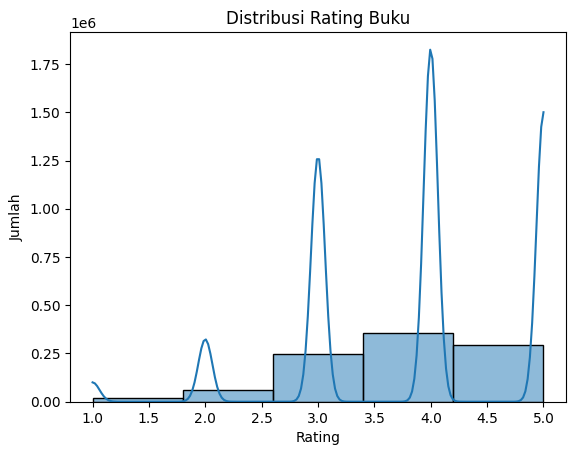

In [58]:
# Visualisasi distribusi rating buku
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title('Distribusi Rating Buku')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

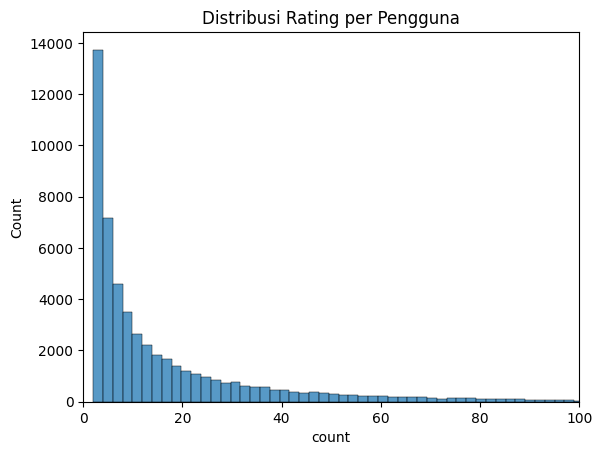

In [59]:
# Visualisasi distribusi jumlah rating per user
user_rating_counts = ratings['user_id'].value_counts()
sns.histplot(user_rating_counts, bins=100)
plt.title('Distribusi Rating per Pengguna')
plt.xlim(0, 100)  # Fokus pada pengguna dengan rating sampai 100 kali
plt.show()

In [60]:
# Mengatasi missing value pada dataset books
books.fillna({'language_code': books['language_code'].mode()[0]}, inplace=True)

## DATA PREPARATION

Membaca dataset dari file CSV ke dalam DataFrame bernama *books.*

In [61]:
books = pd.read_csv('./goodbooks10k/books.csv')

Mengecek nama kolom dan beberapa data teratas untuk memahami struktur data.

In [62]:
print(books.columns)
print(books.head())

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   
3   4     2657          2657  3275794          487   61120081  9.780061e+12   
4   5     4671          4671   245494         1356  743273567  9.780743e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0

Menyaring kolom-kolom penting saja dari dataset, lalu membuat salinan ke book_new agar data asli tidak berubah.

In [63]:
book_new = books[['book_id', 'title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']].copy()

Mengganti nama kolom menjadi lebih ringkas dan mudah digunakan.

In [64]:
book_new.columns = ['id', 'title', 'author', 'year', 'avg_rating', 'num_ratings']

Menampilkan 10 data awal dan 5 data acak untuk melihat distribusi dan isi data.

In [65]:
print(book_new.head(10))
print(book_new.sample(5))

         id                                              title  \
0   2767052            The Hunger Games (The Hunger Games, #1)   
1         3  Harry Potter and the Sorcerer's Stone (Harry P...   
2     41865                            Twilight (Twilight, #1)   
3      2657                              To Kill a Mockingbird   
4      4671                                   The Great Gatsby   
5  11870085                             The Fault in Our Stars   
6      5907                                         The Hobbit   
7      5107                             The Catcher in the Rye   
8       960              Angels & Demons  (Robert Langdon, #1)   
9      1885                                Pride and Prejudice   

                        author    year  avg_rating  num_ratings  
0              Suzanne Collins  2008.0        4.34      4780653  
1  J.K. Rowling, Mary GrandPré  1997.0        4.44      4602479  
2              Stephenie Meyer  2005.0        3.57      3866839  
3        

Mengecek nilai kosong (missing values) di setiap kolom


In [66]:
print(book_new.isnull().sum())

id              0
title           0
author          0
year           21
avg_rating      0
num_ratings     0
dtype: int64


Menangani nilai kosong pada kolom year dengan mengisinya menggunakan nilai median. Ini adalah pendekatan umum untuk data numerik yang kemungkinan skewed.

In [67]:
median_year = book_new['year'].median()
book_new['year'] = book_new['year'].fillna(median_year)

Mengecek ulang apakah masih ada nilai kosong setelah pengisian.

In [68]:
print(book_new.isnull().sum())

id             0
title          0
author         0
year           0
avg_rating     0
num_ratings    0
dtype: int64


## MODELLING & RESULTS

***Content Based Filtering***

Menyiapkan dataset buku agar hanya berisi informasi penting yang diperlukan untuk membangun sistem rekomendasi berbasis konten (content-based filtering).

In [70]:
# === Data Preparation for Content-Based Filtering ===
# Menyaring kolom-kolom penting saja dari dataset, lalu membuat salinan ke book_new agar data asli tidak berubah.
book_new = books[['book_id', 'title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']].copy()

# Mengganti nama kolom menjadi lebih ringkas dan mudah digunakan.
book_new.columns = ['id', 'title', 'author', 'year', 'avg_rating', 'num_ratings']

Mengatasi missing value pada kolom year agar proses analisis dan pemodelan tidak terganggu, serta menyiapkan dataframe akhir untuk digunakan pada tahap berikutnya.

In [71]:
# Menangani nilai kosong pada kolom year dengan mengisinya menggunakan nilai median.
median_year = book_new['year'].median()
book_new['year'] = book_new['year'].fillna(median_year)

# Assign the prepared dataframe to the variable 'data' which is used later
data = book_new

# Print head to verify the data
print("Prepared 'data' dataframe head:")
print(data.head())

Prepared 'data' dataframe head:
        id                                              title  \
0  2767052            The Hunger Games (The Hunger Games, #1)   
1        3  Harry Potter and the Sorcerer's Stone (Harry P...   
2    41865                            Twilight (Twilight, #1)   
3     2657                              To Kill a Mockingbird   
4     4671                                   The Great Gatsby   

                        author    year  avg_rating  num_ratings  
0              Suzanne Collins  2008.0        4.34      4780653  
1  J.K. Rowling, Mary GrandPré  1997.0        4.44      4602479  
2              Stephenie Meyer  2005.0        3.57      3866839  
3                   Harper Lee  1960.0        4.25      3198671  
4          F. Scott Fitzgerald  1925.0        3.89      2683664  


Membangun model content-based filtering dengan memanfaatkan informasi teks dari judul dan penulis buku menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency). Model ini akan mengukur kemiripan antar buku berdasarkan konten teks untuk keperluan rekomendasi.



In [121]:
# === Content Based Filtering ===
# Buat TF-IDF Vectorizer dengan stop words bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')

# Gabungkan kolom 'title' dan 'author' menjadi kolom baru 'combined'
# Ensure 'combined' column exists
if 'combined' not in data.columns:
    data['combined'] = data['title'].fillna('') + ' ' + data['author'].fillna('') # Handle potential NaNs

# Fit dan transform data 'combined' (judul + author)
tfidf_matrix = tfidf.fit_transform(data['combined'])

# Buat DataFrame dari tfidf_matrix untuk visualisasi (optional)
tfidf_df = pd.DataFrame.sparse.from_spmatrix(
    tfidf_matrix,
    index=data['title'],
    columns=tfidf.get_feature_names_out()
)

# Filter kolom yang ada nilai TF-IDF > 0 minimal di satu baris (kata yang relevan)
tfidf_nonzero = tfidf_df.loc[:, (tfidf_df > 0).any()]

print("\nTF-IDF Non-Zero Matrix Head:")
print(tfidf_nonzero.head())


TF-IDF Non-Zero Matrix Head:
                                                    000  01  02  03  04  05  \
title                                                                         
The Hunger Games (The Hunger Games, #1)               0   0   0   0   0   0   
Harry Potter and the Sorcerer's Stone (Harry Po...    0   0   0   0   0   0   
Twilight (Twilight, #1)                               0   0   0   0   0   0   
To Kill a Mockingbird                                 0   0   0   0   0   0   
The Great Gatsby                                      0   0   0   0   0   0   

                                                    06  07  08  09  ...  桜坂洋  \
title                                                               ...        
The Hunger Games (The Hunger Games, #1)              0   0   0   0  ...    0   
Harry Potter and the Sorcerer's Stone (Harry Po...   0   0   0   0  ...    0   
Twilight (Twilight, #1)                              0   0   0   0  ...    0   
To Kill a Mockin

Menghitung kemiripan antar buku berdasarkan representasi TF-IDF dari teks gabungan (judul + penulis) menggunakan cosine similarity dan membuat fungsi rekomendasi yang mengembalikan daftar buku paling mirip.

In [122]:
# Hitung cosine similarity matrix dari tfidf_matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Ubah menjadi DataFrame dengan index dan kolom berupa judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])

print(cosine_sim_df.sample(5).sample(5, axis=1))  # lihat sample similarity

# Fungsi ini menerima title dan mengembalikan daftar buku paling mirip berdasarkan konten (judul + penulis) menggunakan nilai cosine similarity tertinggi.
def recommend_books(title, cosine_sim=cosine_sim_df, data=data, top_n=10):
    # Cek apakah buku ada di dataset dan di cosine_sim index
    if title not in data['title'].values:
        return f"Buku '{title}' tidak ditemukan dalam data."

    if title not in cosine_sim.index:
         return f"Buku '{title}' tidak ditemukan dalam cosine similarity index."

    # Ambil skor similarity buku tersebut dengan buku lain
    sim_scores = cosine_sim[title]

    # Urutkan skor similarity secara menurun, kecuali dirinya sendiri (nilai max = 1)
    # Use .drop(title, errors='ignore') to handle cases where title might not be in the index (though unlikely here)
    sim_scores = sim_scores.drop(title, errors='ignore').sort_values(ascending=False)


    # Ambil top n buku yang paling mirip
    top_books_titles = sim_scores.head(top_n).index

    # Ambil data buku tersebut dari the main data DataFrame
    # Ensure the comparison is correct, comparing titles
    recommended = data[data['title'].isin(top_books_titles)][['title', 'author', 'year', 'avg_rating']].copy()

    return recommended.reset_index(drop=True)

print(data['title'].head(20))

title                                               Queen of Fire (Raven's Shadow, #3)  \
title                                                                                    
Captive Prince: Volume Two (Captive Prince, #2)                                    0.0   
The Language Instinct: How the Mind Creates Lan...                                 0.0   
Beyond Belief: My Secret Life Inside Scientolog...                                 0.0   
Firestarter                                                                        0.0   
The One I Left Behind                                                              0.0   

title                                               The Rose and the Thorn (The Riyria Chronicles, #2)  \
title                                                                                                    
Captive Prince: Volume Two (Captive Prince, #2)                                                   0.0    
The Language Instinct: How the Mind Creates Lan... 

Merekomendasikan buku-buku yang paling mirip berdasarkan konten (judul dan penulis) dari sebuah buku input menggunakan matriks cosine similarity.

In [76]:
def recommend_books(title, cosine_sim=cosine_sim_df, data=data, top_n=10):
    # Cek apakah buku ada di dataset
    if title not in cosine_sim.index:
        return f"Buku '{title}' tidak ditemukan dalam data."

    # Ambil skor similarity buku tersebut dengan buku lain
    sim_scores = cosine_sim[title]

    # Urutkan skor similarity secara menurun, kecuali dirinya sendiri (nilai max = 1)
    sim_scores = sim_scores.drop(title).sort_values(ascending=False)

    # Ambil top n buku yang paling mirip
    top_books = sim_scores.head(top_n).index

    # Ambil data buku tersebut
    recommended = data[data['title'].isin(top_books)][['title', 'author', 'year', 'avg_rating']]

    return recommended.reset_index(drop=True)

In [77]:
print(data['title'].head(20))

0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (

*Menampilkan 10 buku paling mirip dengan The Hunger Games berdasarkan konten.*

In [78]:
print(recommend_books('The Hunger Games (The Hunger Games, #1)'))

                                               title            author  \
0               Catching Fire (The Hunger Games, #2)   Suzanne Collins   
1                  Mockingjay (The Hunger Games, #3)   Suzanne Collins   
2  The Hunger Games Trilogy Boxset (The Hunger Ga...   Suzanne Collins   
3  The Hunger Games: Official Illustrated Movie C...         Kate Egan   
4                     The Hunger Games Tribute Guide       Emily Seife   
5                                  Hunger (Gone, #2)    Michael  Grant   
6   A Hunger Like No Other (Immortals After Dark #2)      Kresley Cole   
7                    Nemesis Games (The Expanse, #5)  James S.A. Corey   
8                  The Quillan Games (Pendragon, #7)      D.J. MacHale   
9  The World of the Hunger Games (Hunger Games Tr...         Kate Egan   

     year  avg_rating  
0  2009.0        4.30  
1  2010.0        4.03  
2  2010.0        4.49  
3  2012.0        4.51  
4  2012.0        4.40  
5  2009.0        4.02  
6  2006.0        

emberikan rekomendasi buku yang relevan berdasarkan tiga metode pencarian: judul buku, penulis, dan tahun terbit.

In [80]:
def get_recommendations(method, value, top_n=5):
    if method == 'title':
        book_title = value
        if book_title not in data['title'].values:
            print(f"Buku '{book_title}' tidak ditemukan dalam data.")
            return

        if book_title not in cosine_sim_df.index:
            print(f"Buku '{book_title}' tidak ditemukan di cosine_sim_df index.")
            return

        sim_scores = cosine_sim_df.loc[book_title]
        closest_titles = sim_scores.nlargest(top_n + 1).index.drop(book_title)
        recommendations = data[data['title'].isin(closest_titles)].head(top_n).reset_index(drop=True)

        print("Rekomendasi Berdasarkan Judul Buku:")
        for i, row in recommendations.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']}")
        print()

    elif method == 'author':
        author_books = data[data['author'].str.contains(value, case=False, na=False)]
        if author_books.empty:
            print(f"Tidak ditemukan buku oleh penulis '{value}'.")
            return

        top_books = author_books.sort_values(by='avg_rating', ascending=False).head(top_n).reset_index(drop=True)
        print(f"Rekomendasi Buku oleh Penulis '{value}':")
        for i, row in top_books.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']} (Rating: {row['avg_rating']})")
        print()

    elif method == 'year':
        year_books = data[data['year'] == value]
        if year_books.empty:
            print(f"Tidak ada buku ditemukan dari tahun {value}.")
            return

        top_books = year_books.sort_values(by='avg_rating', ascending=False).head(top_n).reset_index(drop=True)
        print(f"Rekomendasi Buku dari Tahun {value}:")
        for i, row in top_books.iterrows():
            print(f"{i+1}. {row['title']} - {row['author']} (Rating: {row['avg_rating']})")
        print()  # Memberi jarak antar output

    else:
        print("Metode tidak dikenal. Gunakan 'title', 'author', atau 'year'.")

In [81]:
# Rekomendasi berdasarkan judul
get_recommendations(method='title', value='The Hunger Games (The Hunger Games, #1)', top_n=5)

# Rekomendasi berdasarkan penulis
get_recommendations(method='author', value='Suzanne Collins', top_n=5)

# Rekomendasi berdasarkan tahun
get_recommendations(method='year', value=2008, top_n=5)

Rekomendasi Berdasarkan Judul Buku:
1. Catching Fire (The Hunger Games, #2) - Suzanne Collins
2. Mockingjay (The Hunger Games, #3) - Suzanne Collins
3. The Hunger Games Trilogy Boxset (The Hunger Games, #1-3) - Suzanne Collins
4. The Hunger Games Tribute Guide - Emily Seife
5. The World of the Hunger Games (Hunger Games Trilogy) - Kate Egan

Rekomendasi Buku oleh Penulis 'Suzanne Collins':
1. The Hunger Games Trilogy Boxset (The Hunger Games, #1-3) - Suzanne Collins (Rating: 4.49)
2. The Hunger Games (The Hunger Games, #1) - Suzanne Collins (Rating: 4.34)
3. Catching Fire (The Hunger Games, #2) - Suzanne Collins (Rating: 4.3)
4. Gregor and the Code of Claw (Underland Chronicles, #5) - Suzanne Collins (Rating: 4.25)
5. Gregor and the Marks of Secret (Underland Chronicles, #4) - Suzanne Collins (Rating: 4.21)

Rekomendasi Buku dari Tahun 2008:
1. Acheron (Dark-Hunter #14) - Sherrilyn Kenyon (Rating: 4.59)
2. Percy Jackson and the Olympians (Percy Jackson and the Olympians, #1-3) - Rick R

***Uji dengan judul yang kurang populer***

In [84]:
get_recommendations(method='title', value='The Quillan Games (Pendragon, #7)', top_n=5)

Rekomendasi Berdasarkan Judul Buku:
1. The Merchant of Death (Pendragon, #1) - D.J. MacHale
2. The Never War (Pendragon, #3) - D.J. MacHale
3. The Rivers of Zadaa (Pendragon, #6) - D.J. MacHale
4. Black Water (Pendragon, #5) - D.J. MacHale
5. Raven Rise (Pendragon, #9) - D.J. MacHale



***Uji dengan penulis yang banyak karya***

In [85]:
get_recommendations(method='author', value='Rick Riordan', top_n=5)

Rekomendasi Buku oleh Penulis 'Rick Riordan':
1. Percy Jackson and the Olympians (Percy Jackson and the Olympians, #1-3) - Rick Riordan (Rating: 4.58)
2. Percy Jackson and the Olympians Boxed Set (Percy Jackson and the Olympians, #1-5) - Rick Riordan, Tk (Rating: 4.57)
3. The House of Hades (The Heroes of Olympus, #4) - Rick Riordan (Rating: 4.54)
4. Percy Jackson's Greek Gods (A Percy Jackson and the Olympians Guide) - Rick Riordan, John Rocco (Rating: 4.51)
5. The Last Olympian (Percy Jackson and the Olympians, #5) - Rick Riordan (Rating: 4.5)



In [87]:
get_recommendations(method='year', value=1900, top_n=5)

Rekomendasi Buku dari Tahun 1900:
1. Selected Stories - Anton Chekhov, Richard Pevear, Larissa Volokhonsky (Rating: 4.36)
2. Up from Slavery - Booker T. Washington, Ishmael Reed (Rating: 4.09)
3. The Wonderful Wizard of Oz (Oz, #1) - L. Frank Baum, W.W. Denslow (Rating: 3.98)
4. The Three Sisters - Anton Chekhov (Rating: 3.76)
5. Sister Carrie - Theodore Dreiser (Rating: 3.72)



In [88]:
get_recommendations(method='year', value=2025, top_n=5)

Tidak ada buku ditemukan dari tahun 2025.


***Menampilkan contoh output rekomendasi buku (content-based filtering)***

In [96]:
print("\nCONTOH OUTPUT TOP-N REKOMENDASI CONTENT-BASED FILTERING")
print("=" * 70)

if 'title' in data.columns and not data.empty:
    if len(data) > 5:
        test_title = data['title'].iloc[5]
        print(f"Testing Content-Based dengan buku: '{test_title}'")

        content_recommendations = recommend_books(test_title, top_n=5)

        if content_recommendations is not None and not content_recommendations.empty:
            print(f"\n CONTENT-BASED RECOMMENDATIONS FOR: '{test_title}'")
            print("=" * 70)
            for i, row in content_recommendations.iterrows():
                print(f"{i}. {row['title']}")
                print(f"   Author: {row.get('author', 'Unknown')}")
                print(f"   Rating: {row.get('avg_rating', 'N/A')}")
                print("-" * 50)
        else:
            print(f"No content-based recommendations available for '{test_title}'.")
    else:
        print("Data does not have enough rows to select index 5.")
else:
    print("Data DataFrame is empty or missing the 'title' column.")


CONTOH OUTPUT TOP-N REKOMENDASI CONTENT-BASED FILTERING
Testing Content-Based dengan buku: 'The Fault in Our Stars'

 CONTENT-BASED RECOMMENDATIONS FOR: 'The Fault in Our Stars'
0. Looking for Alaska
   Author: John Green
   Rating: 4.09
--------------------------------------------------
1. Paper Towns
   Author: John Green
   Rating: 3.88
--------------------------------------------------
2. Full Dark, No Stars
   Author: Stephen King
   Rating: 4.03
--------------------------------------------------
3. The City and the Stars
   Author: Arthur C. Clarke
   Rating: 4.08
--------------------------------------------------
4. Agent to the Stars
   Author: John Scalzi
   Rating: 3.91
--------------------------------------------------


## EVALUATION

***Evaluasi precision pada content-based filtering***

Mengukur performa sistem rekomendasi berbasis konten (content-based filtering) menggunakan metrik evaluasi Precision, Recall, dan F1-Score pada top-k rekomendasi.

In [124]:
def evaluate_cbf_metrics_at_k(cosine_sim_df, data, k=5, sample_size=30):
    print(f"Evaluating Content-Based Filtering dengan Precision, Recall, dan F1-Score @ {k}")

    if data.empty:
        print("Data kosong, tidak bisa evaluasi.")
        return None, None, None

    if 'author' not in data.columns:
        print("Kolom 'author' tidak ditemukan di data, evaluasi tidak bisa dilakukan.")
        return None, None, None

    sample_books = data.sample(n=min(sample_size, len(data)), random_state=42)
    precisions, recalls, f1_scores = [], [], []

    for _, book_row in sample_books.iterrows():
        book_title = book_row['title']
        book_author = book_row['author']

        # Ambil rekomendasi top-k
        recs = recommend_books(book_title, cosine_sim_df, data, top_n=k) # Corrected

        if recs is not None and not recs.empty:
            relevant_count = sum(recs['author'] == book_author)
            precision = relevant_count / k

            # Recall: berapa proporsi buku relevan yang berhasil direkomendasikan
            total_relevant = sum(data['author'] == book_author) - 1
            recall = relevant_count / total_relevant if total_relevant > 0 else 0

            # F1-score: harmonic mean precision & recall
            if precision + recall > 0:
                f1 = 2 * (precision * recall) / (precision + recall)
            else:
                f1 = 0

            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)

    if precisions:
        avg_precision = np.mean(precisions)
        avg_recall = np.mean(recalls)
        avg_f1 = np.mean(f1_scores)

        print(f"Average Precision@{k}: {avg_precision:.4f}")
        print(f"Average Recall@{k}: {avg_recall:.4f}")
        print(f"Average F1-Score@{k}: {avg_f1:.4f}")
        print(f"Evaluasi dilakukan pada {len(precisions)} buku sampel\n")
        return avg_precision, avg_recall, avg_f1
    else:
        print("Tidak ada data untuk evaluasi.")
        return None, None, None


# Contoh panggil dan bandingkan hasil untuk k=3,5,10,20
for k_value in [3, 5, 10, 20]:

    p, r, f1 = evaluate_cbf_metrics_at_k(cosine_sim_df, data, k=k_value, sample_size=30)
    print(f"Hasil evaluasi Precision@{k_value}: {p}")

Evaluating Content-Based Filtering dengan Precision, Recall, dan F1-Score @ 3
Average Precision@3: 0.5778
Average Recall@3: 0.3245
Average F1-Score@3: 0.3438
Evaluasi dilakukan pada 30 buku sampel

Hasil evaluasi Precision@3: 0.5777777777777777
Evaluating Content-Based Filtering dengan Precision, Recall, dan F1-Score @ 5
Average Precision@5: 0.5200
Average Recall@5: 0.4196
Average F1-Score@5: 0.3846
Evaluasi dilakukan pada 30 buku sampel

Hasil evaluasi Precision@5: 0.52
Evaluating Content-Based Filtering dengan Precision, Recall, dan F1-Score @ 10
Average Precision@10: 0.4167
Average Recall@10: 0.5177
Average F1-Score@10: 0.3814
Evaluasi dilakukan pada 30 buku sampel

Hasil evaluasi Precision@10: 0.4166666666666667
Evaluating Content-Based Filtering dengan Precision, Recall, dan F1-Score @ 20
Average Precision@20: 0.3133
Average Recall@20: 0.6246
Average F1-Score@20: 0.3540
Evaluasi dilakukan pada 30 buku sampel

Hasil evaluasi Precision@20: 0.31333333333333335


Mengambil sampel buku dari dataset, kemudian untuk setiap buku menghitung seberapa banyak rekomendasi yang diberikan sesuai dengan penulis asli buku tersebut (sebagai indikator relevansi). Precision mengukur proporsi rekomendasi yang relevan dari keseluruhan rekomendasi top-k, Recall mengukur proporsi rekomendasi relevan dari seluruh buku relevan yang ada, dan F1-Score merupakan rata-rata harmonik dari Precision dan Recall. Evaluasi ini membantu menilai kualitas dan akurasi rekomendasi pada berbagai nilai k (jumlah rekomendasi yang diberikan).